<a href="https://colab.research.google.com/github/Kochristof/Python-Data-Science/blob/main/Amazon%20Reviews%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('1-amazon_reviews.csv')

# Print the DataFrame
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
# Check for missing values in the DataFrame
missing_values = df.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

print("Missing Values per Column:")
print(missing_counts)

Missing Values per Column:
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [5]:
# Remove rows with null values in the 'reviewText' column
df.dropna(subset=['reviewText'], inplace=True)

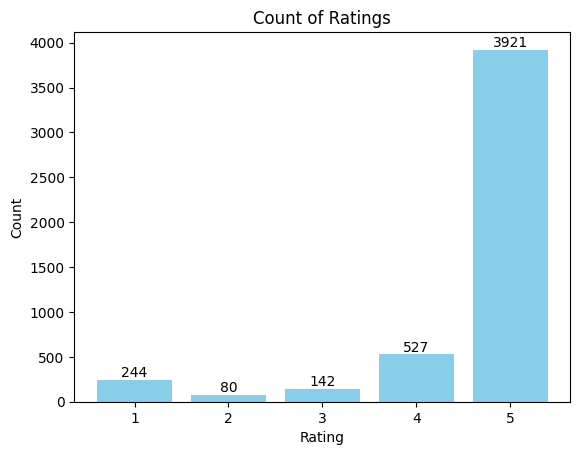

In [6]:
# Count occurrences of each rating
rating_counts = df['overall'].value_counts().sort_index()

# Create bar chart
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')

# Add x-axis labels
plt.xticks(rating_counts.index)

# Add labels to each bar
for i, count in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], count, str(count), ha='center', va='bottom')

# Show plot
plt.show()

In [7]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER function to DataFrame
df['ner_entities'] = df['reviewText'].apply(perform_ner)

# Print DataFrame with NER results
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,ner_entities
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,[]
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,[]
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,[]
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,"[(64, CARDINAL), (3 months, DATE), (S3, ORG), ..."
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,"[(Retail Packaging, PERSON), (english, NORP), ..."


In [9]:
nltk.download('punkt_tab')

def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Handle special characters
    text = re.sub(r'\s+', ' ', text)

    # Tokenize the text into individual words
    words = word_tokenize(text)

    # Lemmatize words to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# df is DataFrame with the 'reviewText' column
df['cleaned_reviewText'] = df['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


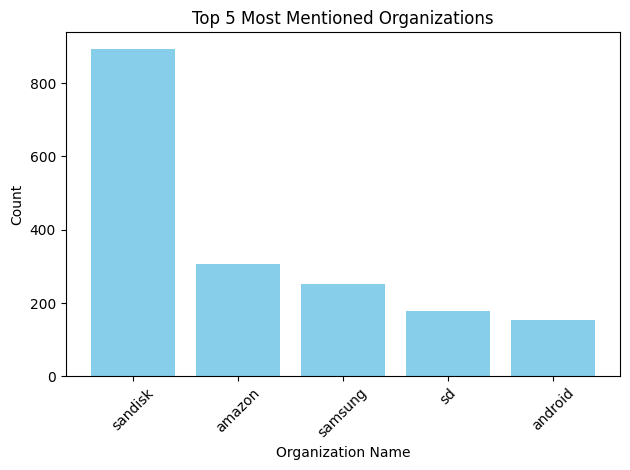

In [10]:
# Function to perform NER and extract organization names
def extract_org_names(text):
    doc = nlp(text)
    org_names = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return org_names

# Apply NER and organization name extraction function to DataFrame
df['org_names'] = df['reviewText'].apply(extract_org_names)

# Flatten the list of organization names
all_org_names = [name.lower() for sublist in df['org_names'] for name in sublist]

# Count occurrences of each organization name
org_name_counts = pd.Series(all_org_names).value_counts()

# Select top 5 most common organization names
top_5_org_names = org_name_counts.head(5)

# Create bar chart
plt.bar(top_5_org_names.index, top_5_org_names.values, color='skyblue')

# Add labels and title
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.title('Top 5 Most Mentioned Organizations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [11]:
# Function to classify sentiment as positive, negative, or neutral
def classify_sentiment(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to perform sentiment analysis and count occurrences of each sentiment category
def count_sentiments(reviews):
    sentiments = reviews.apply(lambda text: classify_sentiment(TextBlob(text).sentiment.polarity))
    sentiment_counts = sentiments.value_counts()
    return sentiment_counts

# Initialize a dictionary to store sentiment counts for each organization
sentiment_counts_by_org = {}

# Iterate over the top 5 organization names
for org in top_5_org_names.index:
    # Filter the DataFrame to get reviews mentioning the current organization name
    org_reviews = df[df['reviewText'].str.contains(org, case=False)]['reviewText']
    # Count occurrences of each sentiment category in the reviews for the organization
    sentiment_counts = count_sentiments(org_reviews)
    sentiment_counts_by_org[org] = sentiment_counts

# Display the sentiment counts for each organization
for org, sentiment_counts in sentiment_counts_by_org.items():
    print(f"Organization: {org}")
    print(f"Positive Reviews: {sentiment_counts.get('positive', 0)}")
    print(f"Negative Reviews: {sentiment_counts.get('negative', 0)}")
    print(f"Neutral Reviews: {sentiment_counts.get('neutral', 0)}")
    print()

Organization: sandisk
Positive Reviews: 826
Negative Reviews: 132
Neutral Reviews: 31

Organization: amazon
Positive Reviews: 277
Negative Reviews: 27
Neutral Reviews: 5

Organization: samsung
Positive Reviews: 646
Negative Reviews: 62
Neutral Reviews: 37

Organization: sd
Positive Reviews: 1127
Negative Reviews: 133
Neutral Reviews: 46

Organization: android
Positive Reviews: 208
Negative Reviews: 16
Neutral Reviews: 8



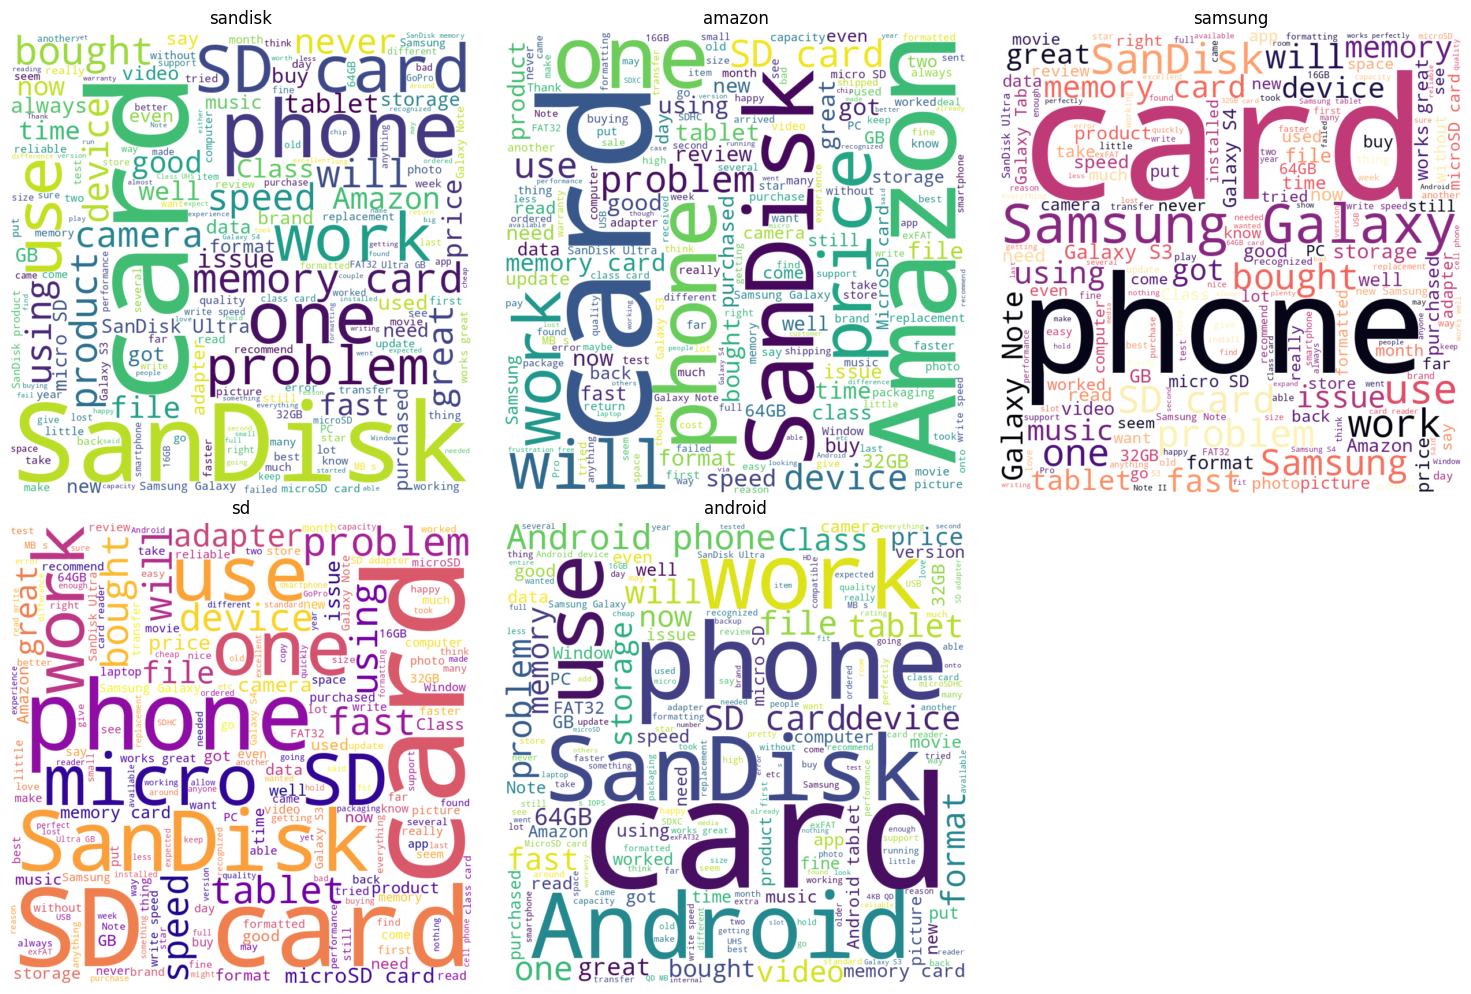

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Initialize a dictionary to store words for each sentiment
top_words = {}

# Iterate over the top 5 organization names
for org in top_5_org_names.index:
    # Filter the DataFrame to get reviews mentioning the current organization name
    org_reviews = df[df['reviewText'].str.contains(org, case=False)]['reviewText']
    # Extract words from reviews
    words = ' '.join(org_reviews)
    top_words[org] = words

# Create WordClouds for each organization
plt.figure(figsize=(15, 10))
for i, (org, words) in enumerate(top_words.items(), 1):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10,
                          colormap=random.choice(['viridis', 'plasma', 'inferno', 'magma'])).generate(words)
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(org)
    plt.axis("off")

plt.tight_layout()
plt.show()